Unikalne znaki: 28
Długość tekstu: 164
Liczba sekwencji: 134


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0832 - loss: 3.3222 
Osiągnięto docelową dokładność 0.1!
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.0939 - loss: 3.3133

Generowanie tekstu z seedem: 'As machines become'
As machines becomeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

Generowanie tekstu z seedem: 'tasks considered'
tasks consideredeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

Generowanie tekstu z seedem: 'AI effect'
AI effecteeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee


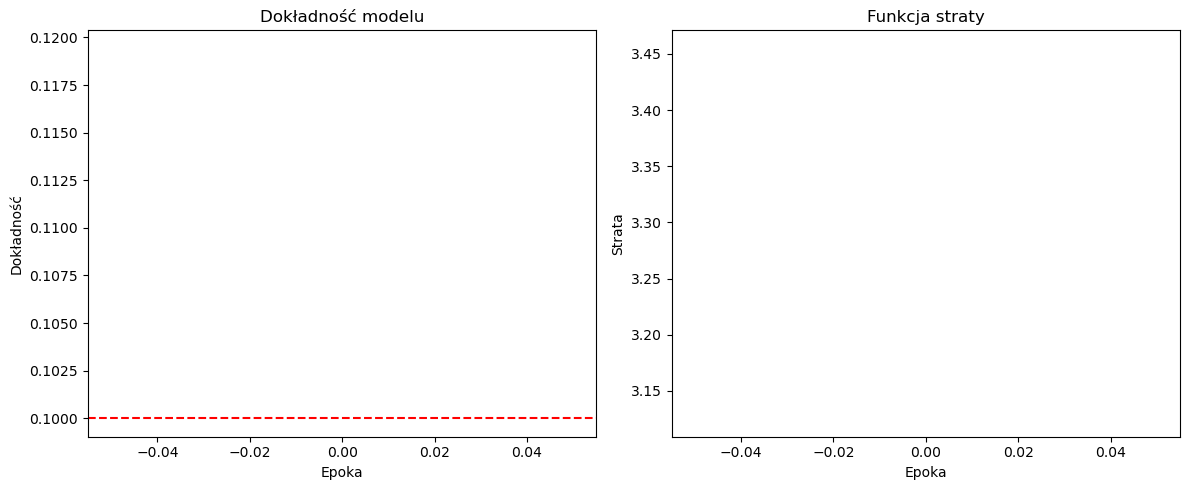


Końcowa dokładność: 0.1418
Końcowa strata: 3.0493


In [3]:
### Ulepszona sieć LSTM do nauki tekstu
# Celem jest osiągnięcie stabilnej dokładności powyżej 10%
# Tekst: "As machines become increasingly capable, tasks considered to require 'intelligence' are often removed from the definition of AI, a phenomenon known as the AI effect"

# %%
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping

# %%
# Parametry
TEXT = "As machines become increasingly capable, tasks considered to require 'intelligence' are often removed from the definition of AI, a phenomenon known as the AI effect"
SEQ_LENGTH = 30  # Wydłużona sekwencja
EMBEDDING_DIM = 32  # Zwiększony wymiar osadzania
LSTM_UNITS = 128  # Więcej jednostek LSTM
BATCH_SIZE = 16  # Mniejszy batch size
EPOCHS = 200  # Więcej epok
TARGET_ACCURACY = 0.1  # Docelowa dokładność

# %%
# Przygotowanie danych
chars = sorted(list(set(TEXT)))
char_to_int = {c: i for i, c in enumerate(chars)}
int_to_char = {i: c for i, c in enumerate(chars)}
n_chars = len(TEXT)
n_vocab = len(chars)

print(f"Unikalne znaki: {n_vocab}")
print(f"Długość tekstu: {n_chars}")

# %%
# Tworzenie datasetu
X = []
y = []

for i in range(0, n_chars - SEQ_LENGTH):
    seq_in = TEXT[i:i + SEQ_LENGTH]
    seq_out = TEXT[i + SEQ_LENGTH]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

n_patterns = len(X)
print(f"Liczba sekwencji: {n_patterns}")

# %%
# Przekształcenie danych do formatu Keras
X_reshaped = np.reshape(X, (n_patterns, SEQ_LENGTH))
y_categorical = to_categorical(y, num_classes=n_vocab)

# %%
# Budowa ulepszonego modelu
model = Sequential()
model.add(Embedding(n_vocab, EMBEDDING_DIM, input_length=SEQ_LENGTH))
model.add(LSTM(LSTM_UNITS, return_sequences=True))  # Pierwsza warstwa LSTM
model.add(LSTM(LSTM_UNITS))  # Druga warstwa LSTM
model.add(Dense(n_vocab, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# %%
# Callback do zatrzymania przy osiągnięciu docelowej dokładności
class AccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= TARGET_ACCURACY:
            print(f"\nOsiągnięto docelową dokładność {TARGET_ACCURACY}!")
            # Kontynuuj trening do końca epoki
            self.model.stop_training = True

# Dodatkowy callback do wczesnego zatrzymania
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=10,
    min_delta=0.001,
    mode='max',
    restore_best_weights=True
)

# %%
# Trening modelu
history = model.fit(
    X_reshaped,
    y_categorical,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[AccuracyCallback(), early_stop]
)

# %%
# Generowanie przykładowej predykcji
def generate_text(seed_text, num_chars=100):
    generated = seed_text
    print(f"\nGenerowanie tekstu z seedem: '{seed_text}'")
    
    for i in range(num_chars):
        x_pred = np.array([[char_to_int[c] for c in seed_text[-SEQ_LENGTH:]]])
        prediction = model.predict(x_pred, verbose=0)
        index = np.argmax(prediction)
        result = int_to_char[index]
        generated += result
        seed_text = seed_text[1:] + result if len(seed_text) >= SEQ_LENGTH else seed_text + result
    
    print(generated)

# Generowanie z różnych seedów
generate_text("As machines become")
generate_text("tasks considered")
generate_text("AI effect")

# %%
# Wizualizacja procesu uczenia
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Dokładność modelu')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.axhline(y=TARGET_ACCURACY, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Funkcja straty')
plt.ylabel('Strata')
plt.xlabel('Epoka')

plt.tight_layout()
plt.show()

# %%
# Ocena końcowego modelu
loss, accuracy = model.evaluate(X_reshaped, y_categorical, verbose=0)
print(f"\nKońcowa dokładność: {accuracy:.4f}")
print(f"Końcowa strata: {loss:.4f}")